In [1]:
'''BE CAREFUL RUNNIG THIS SCRIPT CAN OVERWRIE THE WHOLE DATA ON DISK'''

'BE CAREFUL RUNNIG THIS SCRIPT CAN OVERWRIE THE WHOLE DATA ON DISK'

In [2]:
'''BE CAREFUL CHANGING THE LABELS STRUCTURE, MAKE SURE TO CHANGE classification/cross_validation.parse_classification_report'''

'BE CAREFUL CHANGING THE LABELS STRUCTURE, MAKE SURE TO CHANGE classification/cross_validation.parse_classification_report'

In [3]:
# Imports
# Modelation
import sklearn.svm as svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from classification.keras_neural_nets import *

import os

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from learning_pipelines import supervised_pipeline, plot_eda, load_eda

In [5]:
# arguments
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 20 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 30 * 60 )]
                                    },
                        }



param_grid = [
              {'ANN__epochs': [10],
               'ANN__batch_size': [100],
               'ANN__hidden_layers_nr': [1],
               'ANN__hidden_nodes_per_layer': [i for i in xrange(3, 13)],
               'ANN__hidden_nodes_activation': ['relu']
              }
]
pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
                                        input_dim = 5,
                                          output_dim = 3,
                                          verbose=0))])

pipe = Pipeline([('SVC', svm.SVC())])
param_grid = [{'SVC__C': [2**i for i in xrange(-5, 11)], 
                'SVC__gamma':[2**i for i in xrange(-15, 1)]}]

pipe = Pipeline([('GaussNB', GaussianNB())])
param_grid = [
              {'GaussNB__priors': [None]},
]

pipe = Pipeline([('KNN', KNeighborsClassifier())])
param_grid = [{'KNN__n_neighbors': [i for i in xrange(1, 15, 2)]}]



feature_slot = 'hrv_computation'
hyper_param=0

scaler = StandardScaler()

learn_flag=True
compute_all_new=True
plot_eda_all_new=True


[2018-04-24 17:50:13.692837]:get_signal:20:Loading [signal: 3_FA7774DK_ECG-_2017-04-20 07:38:44.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-24 17:50:13.702149]:get_signal:20:Loading [signal: 3_FA7774DR_ECG-_2017-04-20 16:09:45.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__sample

('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('feature_slot', 'hrv_computation')('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 1200000)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': {'color': 'green', 'intervals_samples': [(0, 1800000)], 'label': 'Baseline Data Points'}})('patient_list', [3])('hyper_param', 0)('group_id', 'seizure_nr')

This is a list of the parameters
["('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('feature_slot', 'pca_beat_amp_computation')('interim_processing', [StandardScaler

3
1
data
3
2


[2018-04-24 17:50:17.416334]:get_signal:20:Loading [signal: 3_FA7774DI_ECG-_2017-04-20 03:38:19.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-24 17:50:17.431709]:get_signal:20:Loading [signal: 3_FA7774DJ_ECG-_2017-04-20 05:38:32.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$begi

Here is the data
              hrv  time_sample patient_nr seizure_nr                    label  \
0        1.082000         2111          3          0  Inter-Ictal Data Points   
1        1.082012         2112          3          0  Inter-Ictal Data Points   
2        1.082025         2113          3          0  Inter-Ictal Data Points   
3        1.082037         2114          3          0  Inter-Ictal Data Points   
4        1.082049         2115          3          0  Inter-Ictal Data Points   
5        1.082061         2116          3          0  Inter-Ictal Data Points   
6        1.082074         2117          3          0  Inter-Ictal Data Points   
7        1.082086         2118          3          0  Inter-Ictal Data Points   
8        1.082098         2119          3          0  Inter-Ictal Data Points   
9        1.082111         2120          3          0  Inter-Ictal Data Points   
10       1.082123         2121          3          0  Inter-Ictal Data Points   
11       1.

data
3
0
Here is the baseline data
              hrv  time_sample patient_nr seizure_nr                 label  \
0        0.913000         2570          3          0  Baseline Data Points   
1        0.913026         2571          3          0  Baseline Data Points   
2        0.913051         2572          3          0  Baseline Data Points   
3        0.913077         2573          3          0  Baseline Data Points   
4        0.913102         2574          3          0  Baseline Data Points   
5        0.913127         2575          3          0  Baseline Data Points   
6        0.913153         2576          3          0  Baseline Data Points   
7        0.913178         2577          3          0  Baseline Data Points   
8        0.913203         2578          3          0  Baseline Data Points   
9        0.913228         2579          3          0  Baseline Data Points   
10       0.913253         2580          3          0  Baseline Data Points   
11       0.913278         258

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


This is the path to save!
/mnt/Seagate/pre_epi_seizures/EDanalysis_new/1ef3a500-46cc-11e8-894a-b06ebfc25cc2/


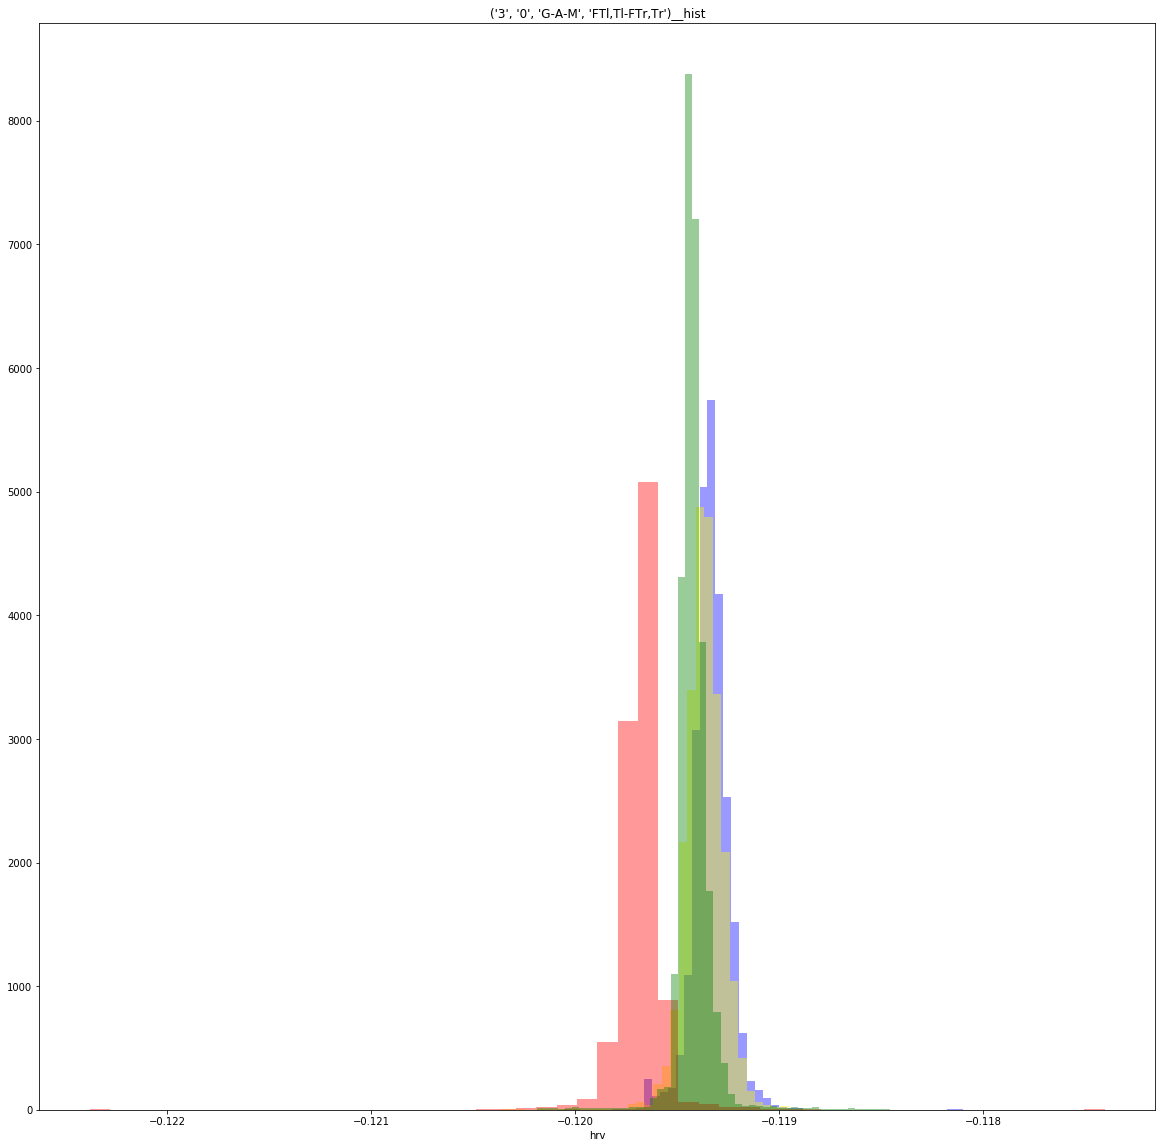

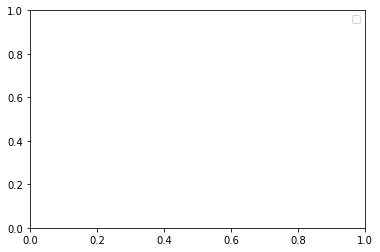

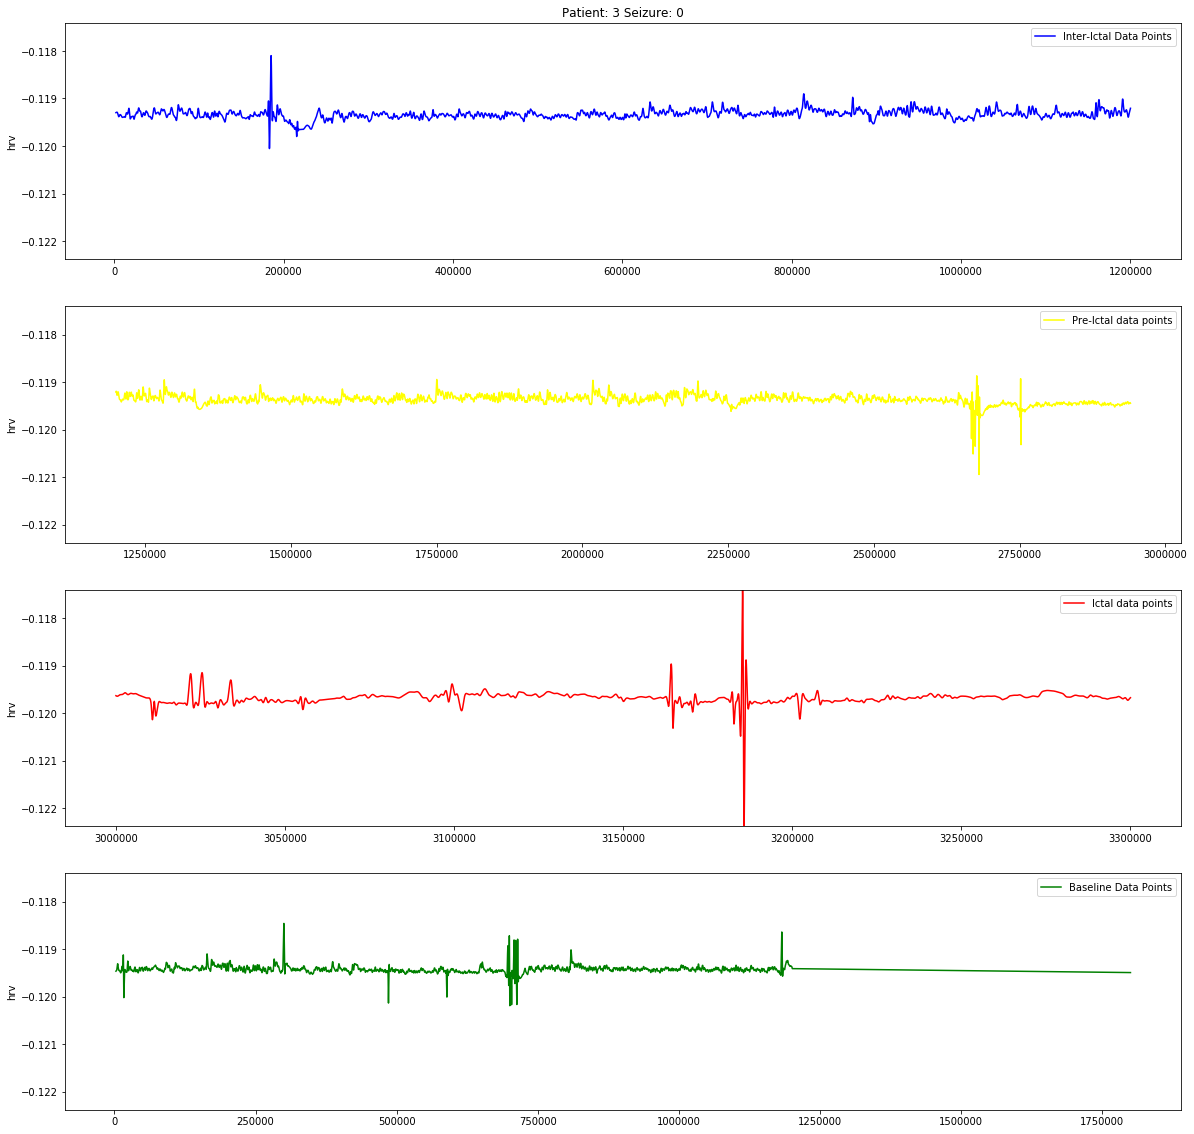

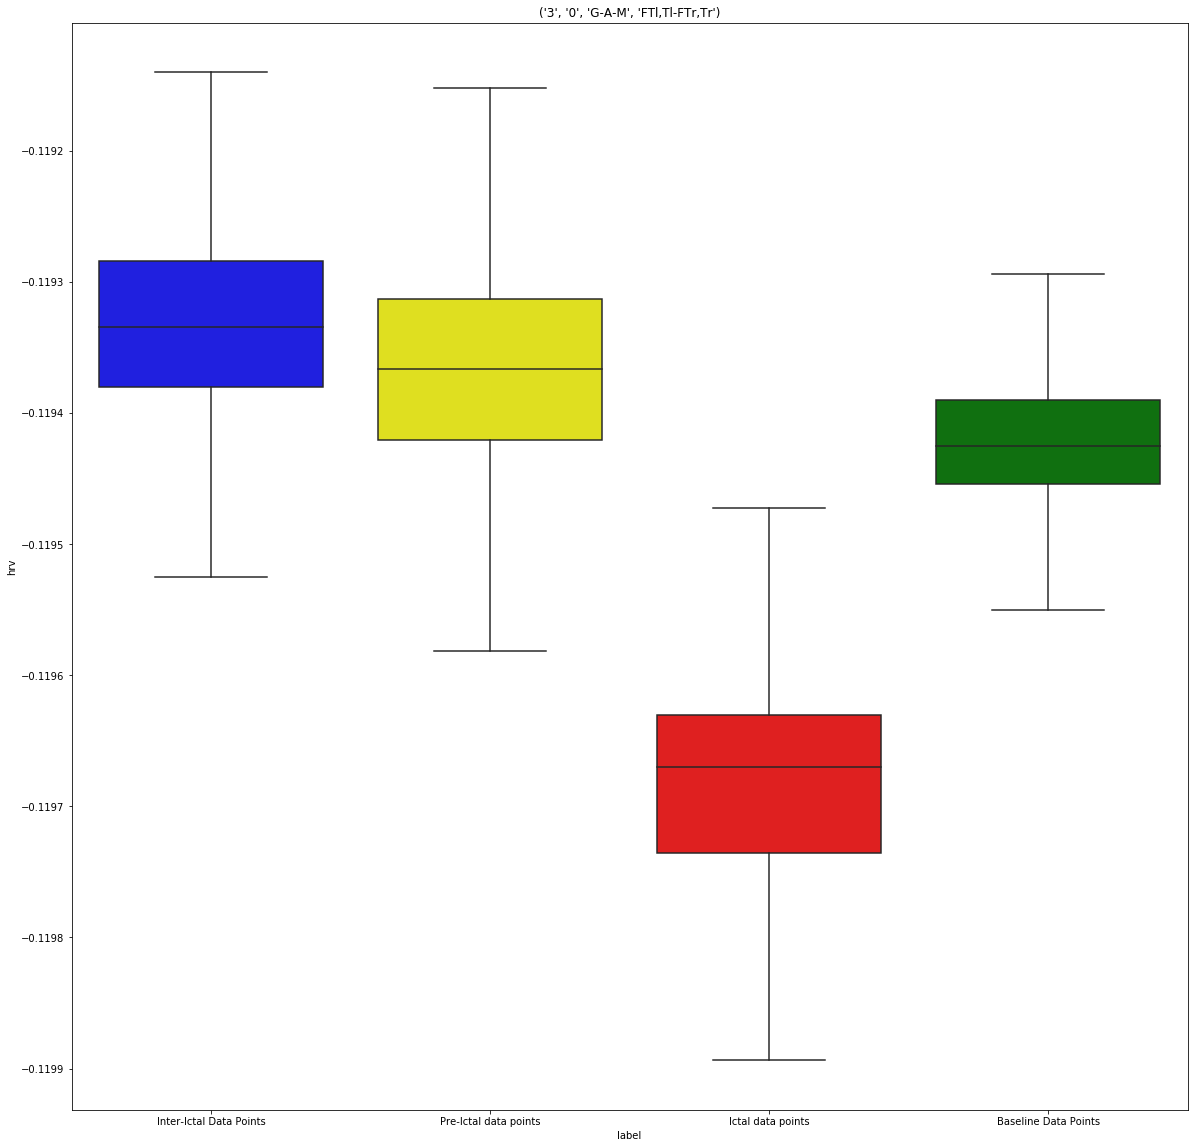

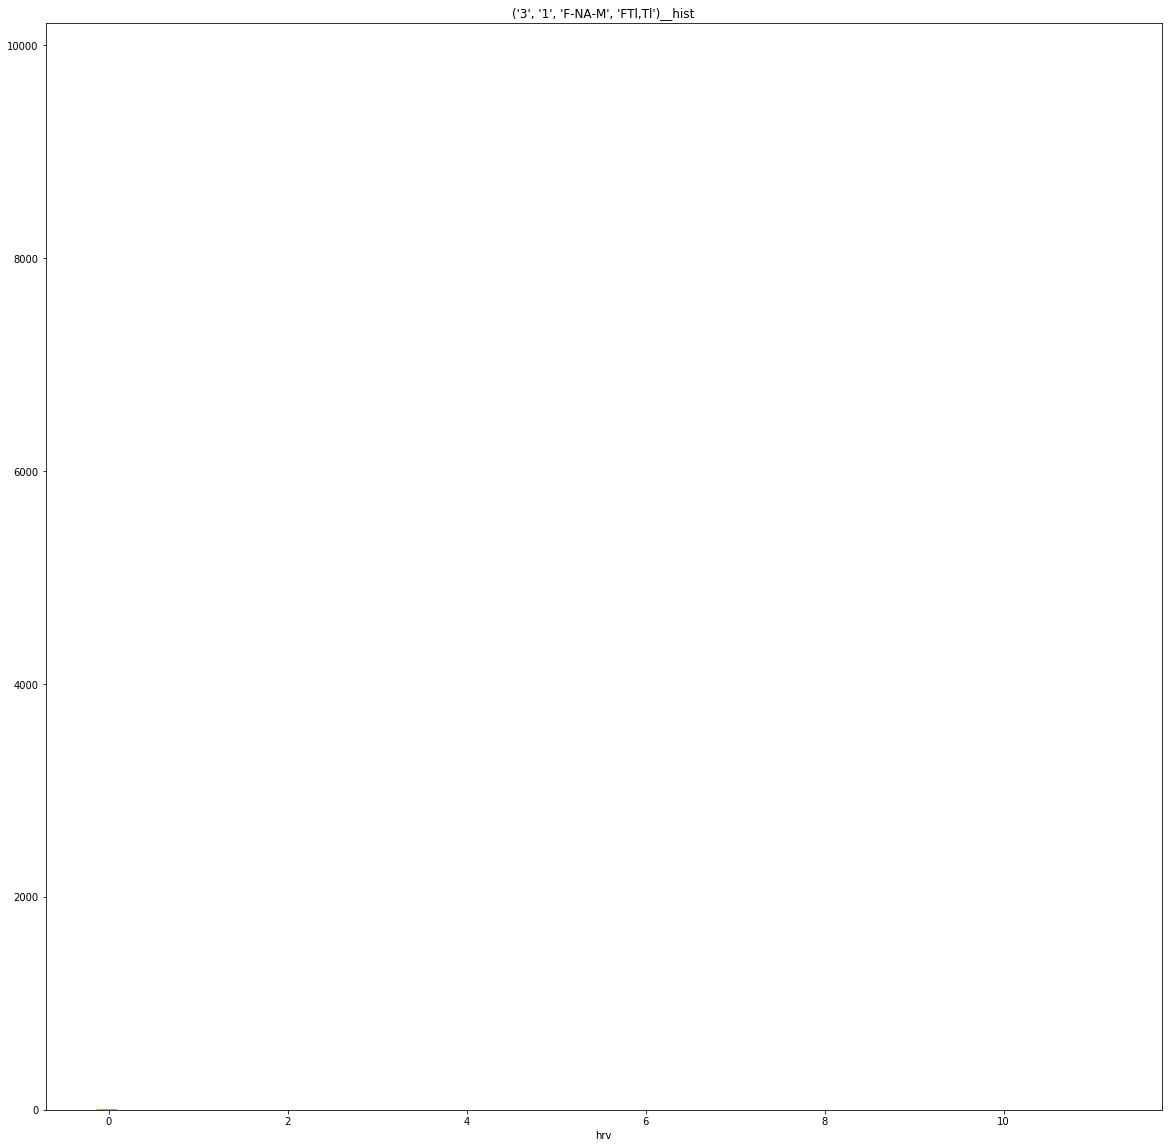

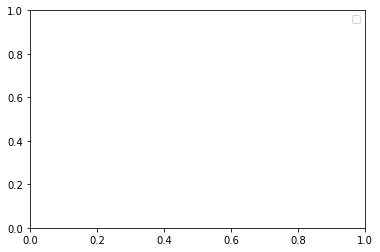

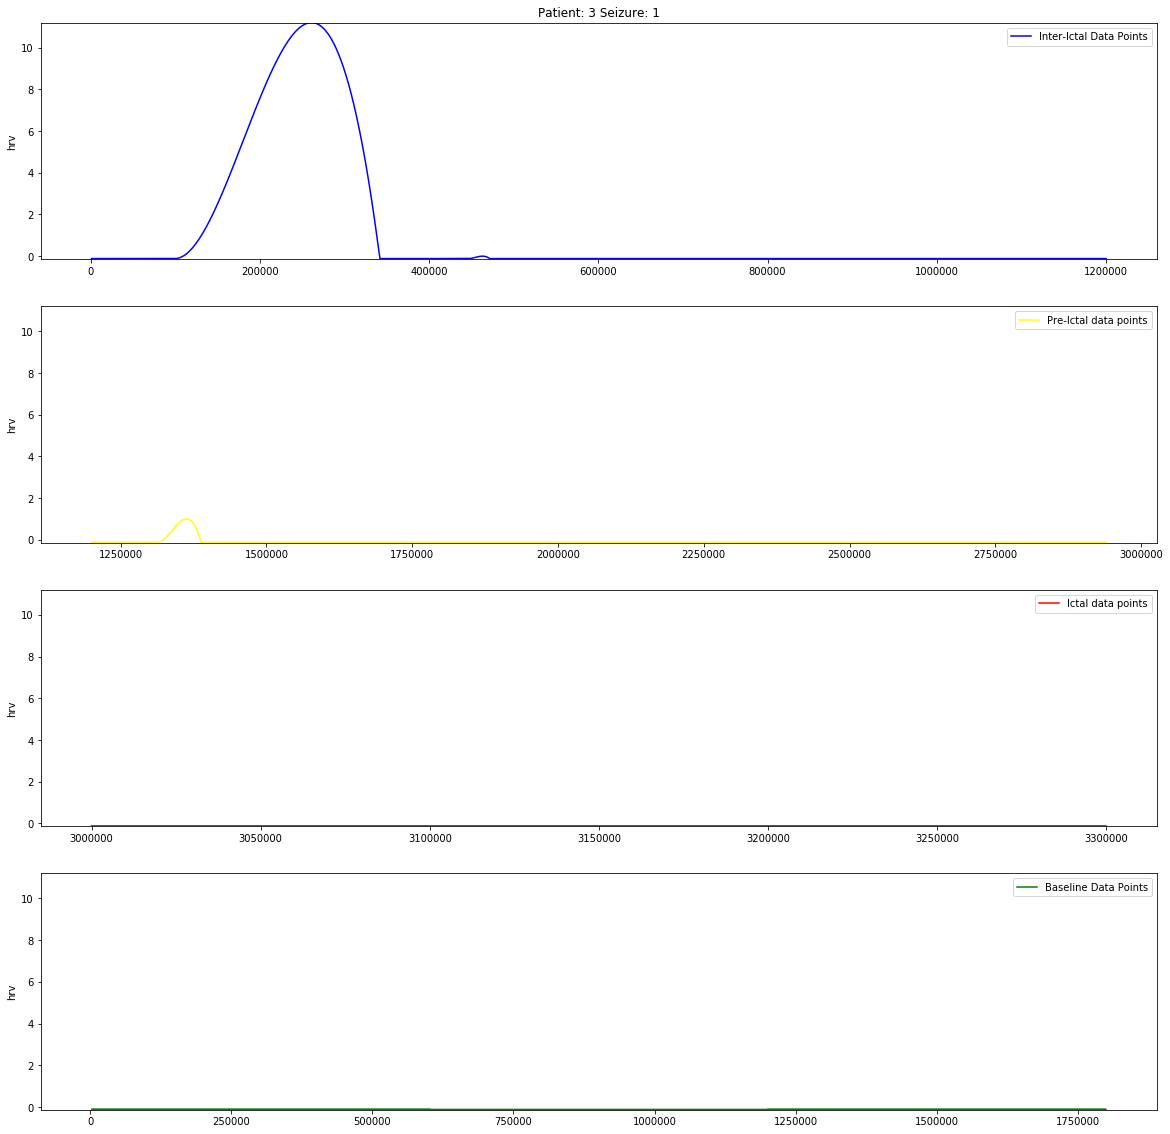

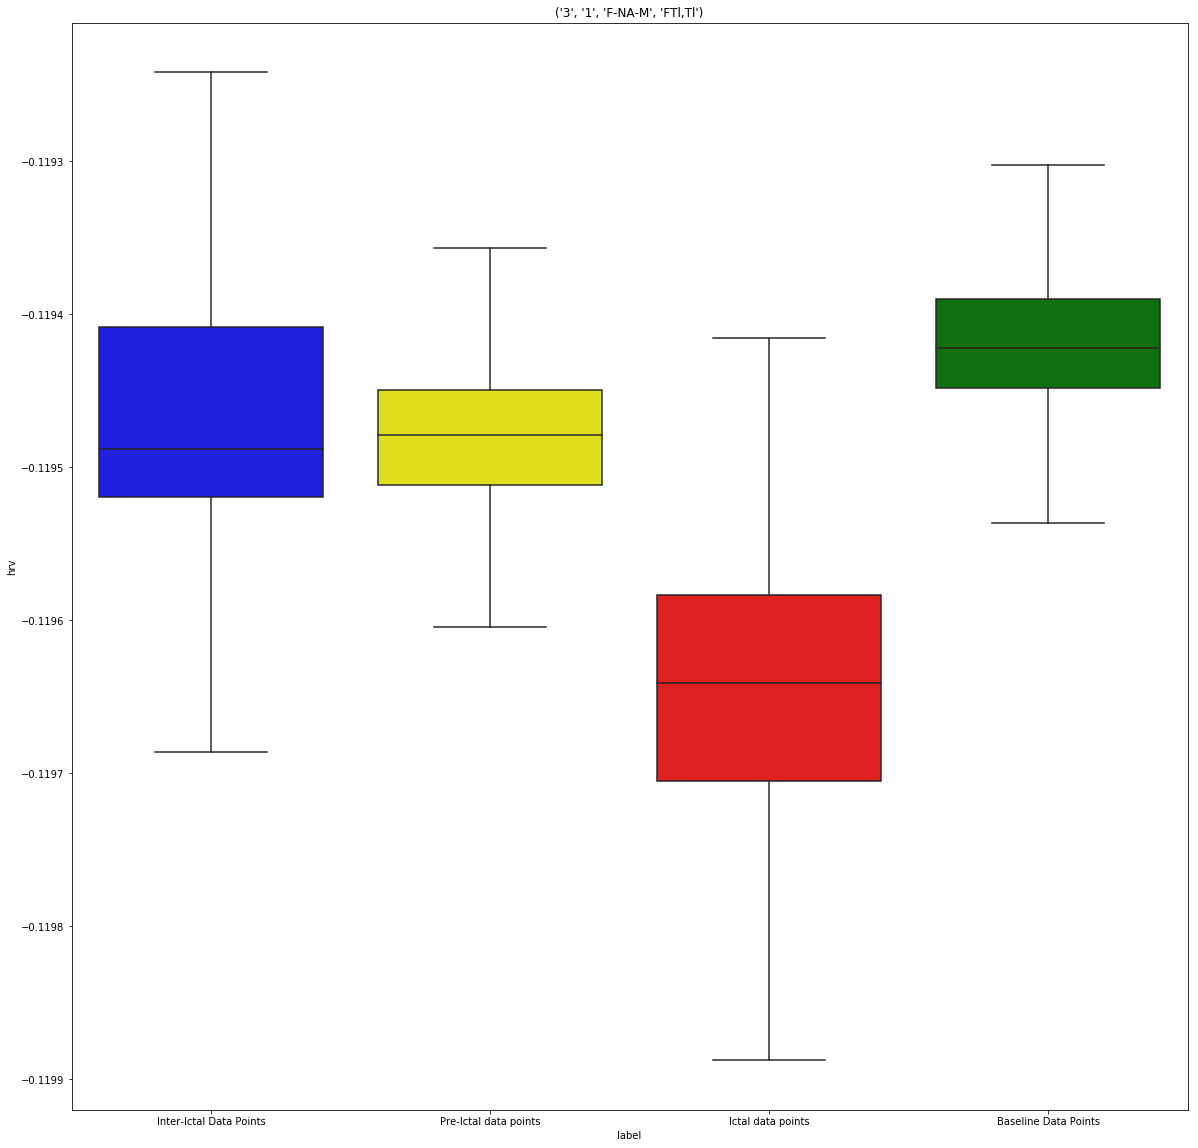

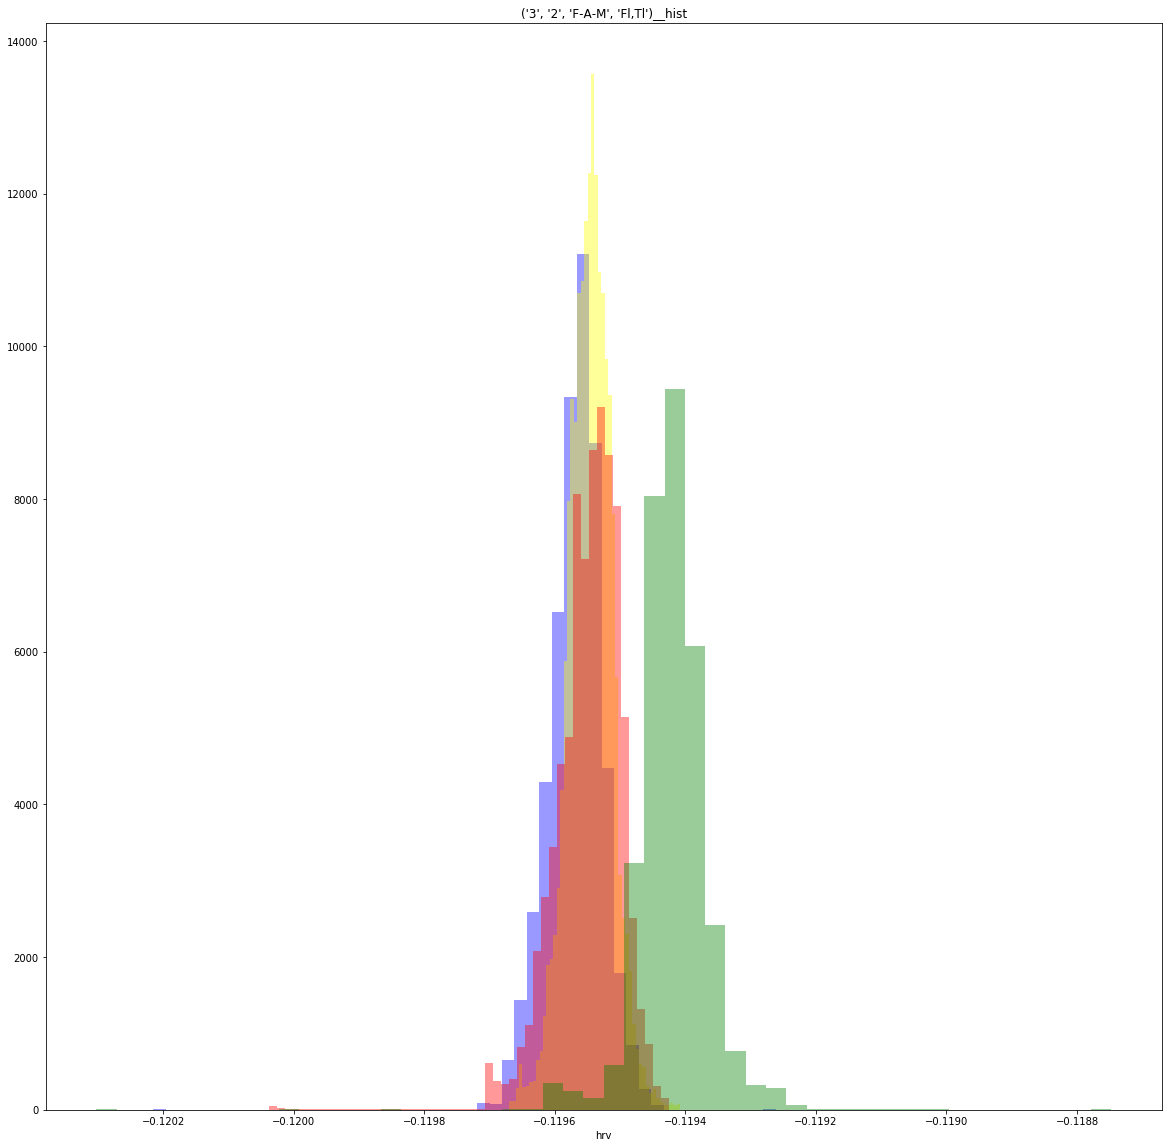

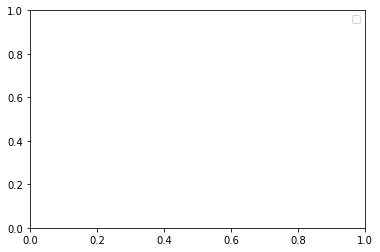

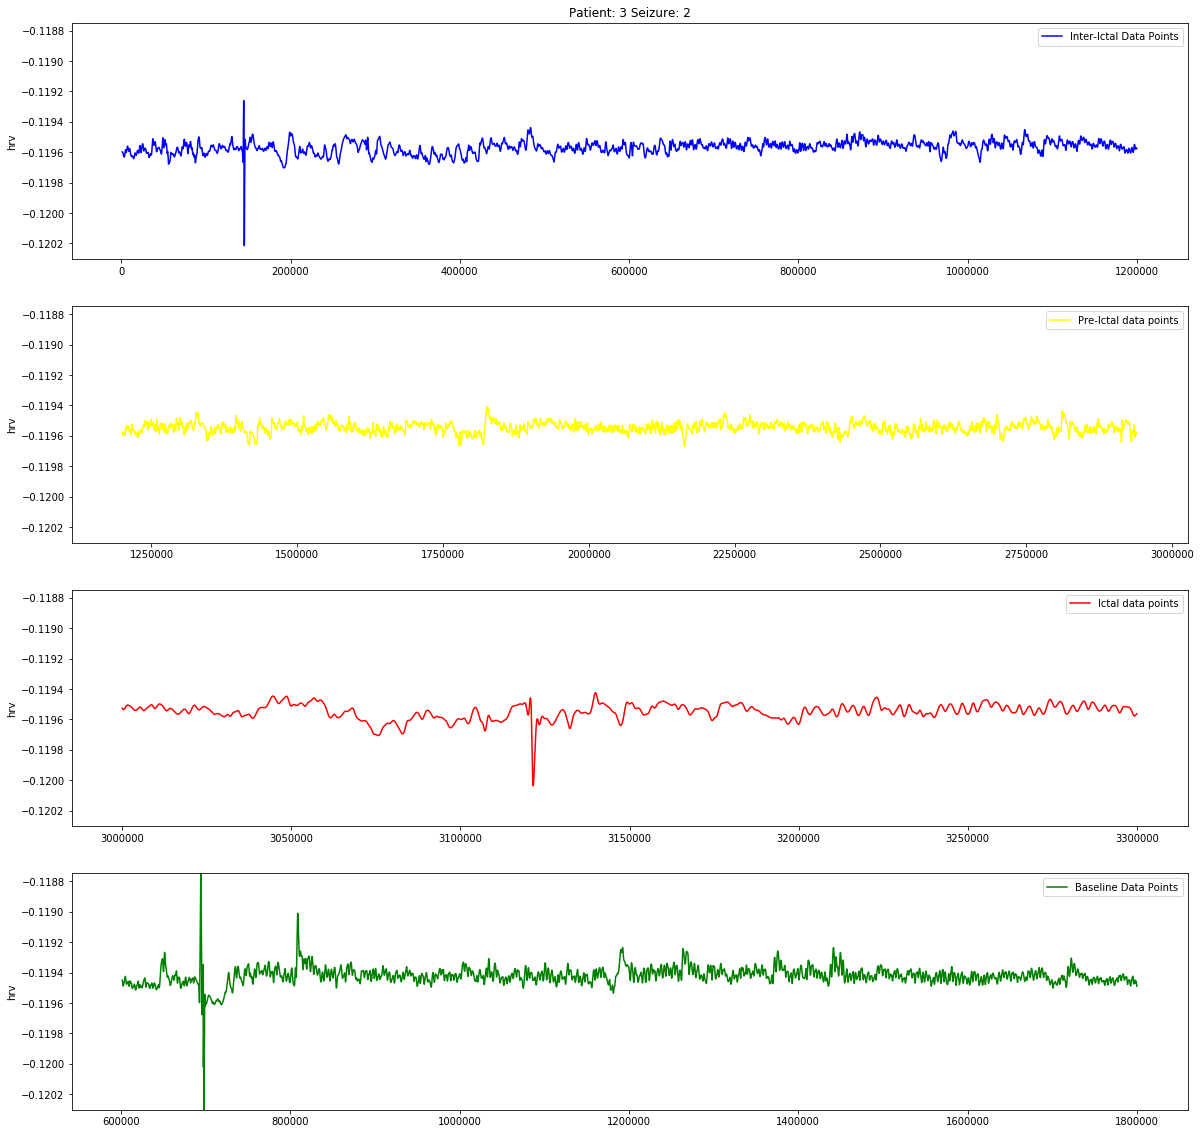

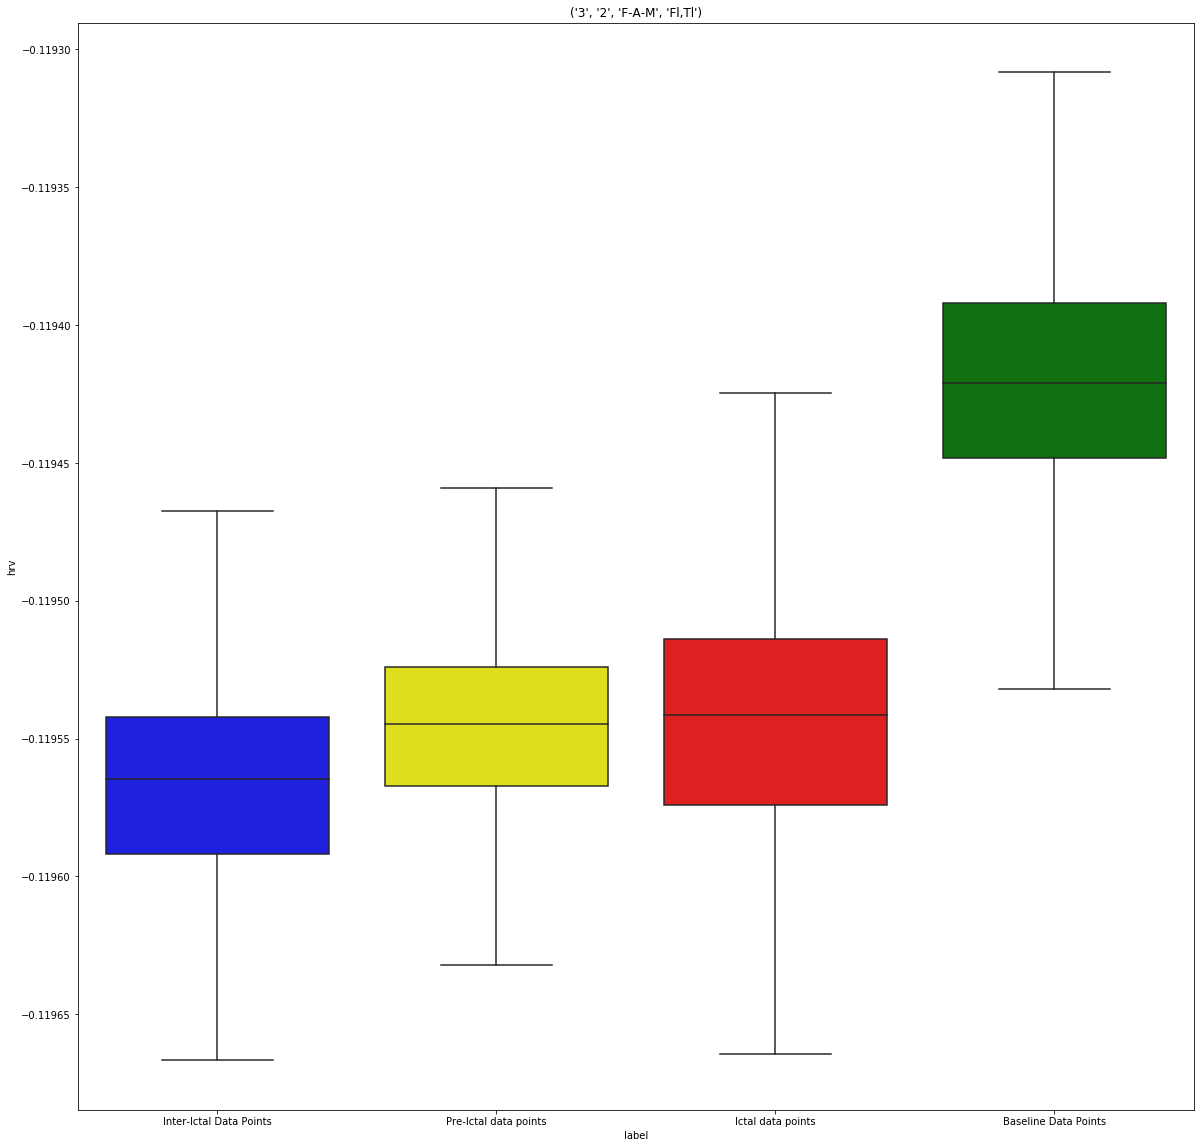

Plotted!


In [6]:


patient_lists = [[3]]


for patient_list in patient_lists:
    

    plot_eda(label_struct, baseline_label_struct,
             pipe, scaler, param_grid,
             patient_list,
             feature_slot,
             hyper_param,
             plot_eda_all_new,
             learn_flag,
             compute_all_new)








In [7]:
del y

NameError: name 'y' is not defined

In [ ]:
client.compute(y)